In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

## $0\nu\rm{ECEC}$ resonance

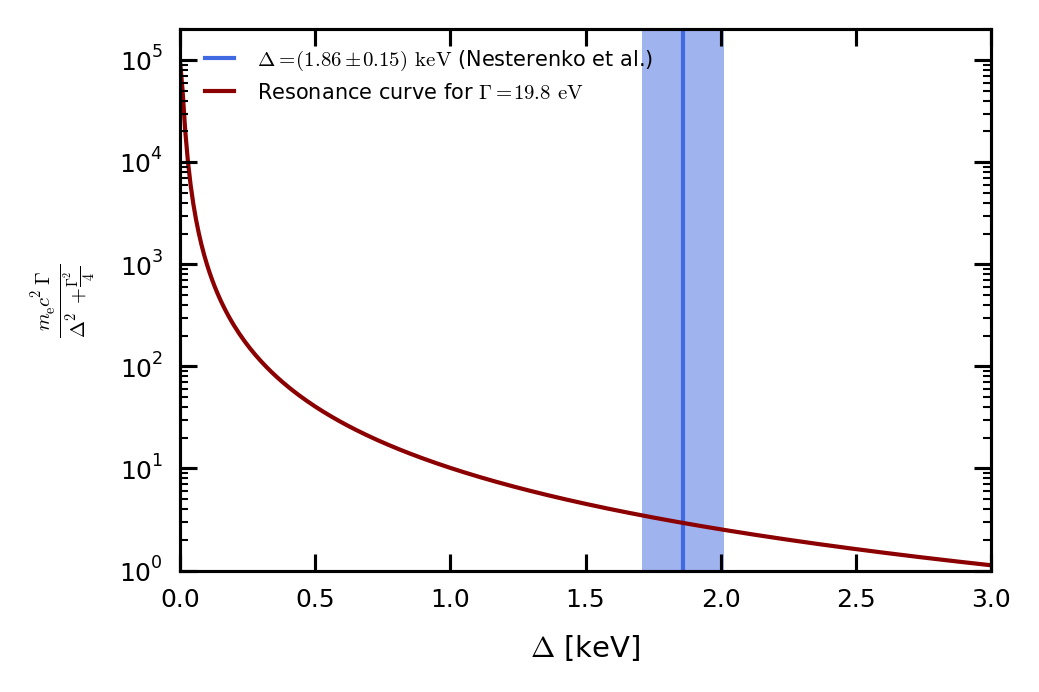

In [92]:
aDelta = 1.86 #keV
aDeltaerr = 0.15 #keV
aGamma = 0.0198 #keV
mec2 = 511 #keV

def finesse(delta, gamma):
    return np.divide(mec2*gamma,np.add(np.power(delta,2),gamma**2/4))

deltas=np.arange(-0.01,20, 0.01)

plt.axvline(aDelta, color='royalblue', label='$\\Delta = (1.86 \\pm 0.15)\,\\rm{keV}$ (Nesterenko et al.)', linestyle='-')
#plt.axvspan(aDelta-2*aDeltaerr,aDelta+2*aDeltaerr, edgecolor='none', facecolor='royalblue', alpha=0.3)
plt.axvspan(aDelta-aDeltaerr,aDelta+aDeltaerr, edgecolor='none', facecolor='royalblue', alpha=0.5)
plt.plot(deltas, finesse(deltas, aGamma), color='darkred', label='Resonance curve for $\\Gamma = 19.8\,\\rm{eV}$')
#plt.plot(deltas, finesse(deltas, 0.01), color='green', label='Resonance curve')
#plt.plot(deltas, finesse(deltas, 0.03), color='gold', label='Resonance curve')


plt.xlabel('$\\Delta$ [keV]')
plt.ylabel('$\\frac{m_{\\rm{e}}c^2\\Gamma}{\\Delta^2 + \\frac{\\Gamma^2}{4}}$')
plt.xlim(0,3)
plt.ylim(1e0,2e5)
plt.yscale('log')
plt.legend(frameon=False, loc='upper left')
plt.draw()
plt.savefig('resonance.pdf', bbox_inches='tight')

plt.show()

## Check of two-neutrino decay half-lives

Calculate half-lives independently for all sets of PSFs and accounting for the uncertainties of the half-lives => The min and max of these should give us the proper full range of half-lives.

In [137]:
#Phase-space factors (PSFs)
G={'2nuee': (1.51e-20, 1.72e-20, 2.02e-20), '2nuebp': (1.235e-21, 1.53e-21, 1.720e-21), '2nubpbp': (4.261e-26,4.770e-26,4.85e-26)}
halflife_2nuee=(0.9e22,1.4e22,1.9e22)

# Here we calculatehalflife_2nuebp=np.divide(1,(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nuebp_temp=[np.divide(1,(G['2nuebp']))*hl*G['2nuee'] for hl in halflife_2nuee]
halflife_2nubpbp_temp=[4*np.divide(1,(G['2nubpbp']))*hl*G['2nuee'] for hl in halflife_2nuee]

halflife_2nuebp[0] = [arr[0] for arr in halflife_2nuebp_temp]
halflife_2nuebp[1] = [arr[1] for arr in halflife_2nuebp_temp]
halflife_2nuebp[2] = [arr[2] for arr in halflife_2nuebp_temp]

halflife_2nubpbp[0] = [arr[0] for arr in halflife_2nubpbp_temp]
halflife_2nubpbp[1] = [arr[1] for arr in halflife_2nubpbp_temp]
halflife_2nubpbp[2] = [arr[2] for arr in halflife_2nubpbp_temp]

#print(halflife_2nuebp)
print('The half-life range for 2vECb+ is:', np.min([np.min(arr) for arr in halflife_2nuebp]), np.max([np.max(arr) for arr in halflife_2nuebp]))

#print(halflife_2nubpbp)
print('The half-life range for 2vb+b+ is:', np.min([np.min(arr) for arr in halflife_2nubpbp]), np.max([np.max(arr) for arr in halflife_2nubpbp]))


The half-life range for 2vECb+ is: 1.011764705882353e+23 2.3230769230769232e+23
The half-life range for 2vb+b+ is: 1.275756864585778e+28 3.1653608247422684e+28


Calculate min and max values allowed with uncertainties on PSFs and half-life

In [123]:
#Phase-space factors (PSFs)
G={'2nuee': (1.51e-20, 2.02e-20), '2nuebp': (1.235e-21,1.720e-21), '2nubpbp': (4.261e-26,4.770e-26)}
halflife_2nuee=(0.9e22,1.9e22)

# Here we only compare PSFs that were calculated with the same method
halflife_2nuebp=np.divide(1,(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nubpbp=4*np.divide(1,(G['2nubpbp']))*halflife_2nuee*G['2nuee']

print(halflife_2nuebp)
print(halflife_2nubpbp)

[1.10040486e+23 2.23139535e+23]
[1.27575686e+28 3.21844864e+28]


Mixing 0vECEC half-life uncertainties and different PSFs gives us the largest range, but I would argue it is inconsistent. Let's not do this.

In [124]:
#Here we use the maximum range of PSFs, so we compare values from different PSF calculations (only 2nubpbp values different and array flip)
G={'2nuee': (1.51e-20, 2.02e-20), '2nuebp': (1.235e-21,1.720e-21), '2nubpbp': (4.261e-26,4.850e-26)}
halflife_2nuee=(0.9e22,1.9e22)

#Here we flip the min and max values of the PSFs because we divide by them => larger value => smaller half-life
halflife_2nuebp=np.divide(1,np.flip(G['2nuebp']))*halflife_2nuee*G['2nuee']
halflife_2nubpbp=4*np.divide(1,np.flip(G['2nubpbp']))*halflife_2nuee*G['2nuee']

print(halflife_2nuebp)
print(halflife_2nubpbp)

[7.90116279e+22 3.10769231e+23]
[1.12082474e+28 3.60291011e+28]


## Check of neutrinoless decay half-lives

In [142]:
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

In [173]:
Delta = ufloat(1.86,0.15)

G={'0vee': (25.7e-20), 
   '0vebp': (1710e-20, 1970e-20, 2290e-20), 
   '0vbpbp': (107.8e-20, 114e-20, 123e-20), 
   '0vbb': (14.54e-15, 14.58e-15)}
M={'0vee': {'QRPA': (0.741, 1.298)}, 
   '0vebp': {'QRPA': (2.856, 6.617) , 'NSM': (2.22,4.66)},
   '0vbpbp': {'QRPA': (2.856, 6.617) , 'NSM': (2.22,4.66)},
   '0vbb': {'QRPA': (2.91, 3.5),'pnQRPA': (2.460, 2.975) , 'NSM': (2.28,2.45)}}

mnu=(0.18e-3, 0.48e-3)#keV

np.divide(1, np.max(G['0vbb']) * np.max(M['0vbb']['NSM'])**2 * np.max(mnu)**2/mec2**2)

1.2949995956315767e+25